<p style="text-align:center;color:#06344ef6;font-size:25px;font-family:bodoni MT">Ecole Nationale de la Statistique et de l'Analyse Economique Pierre NDIAYE (ENSAE) </br> 
</p>
<center><img src="https://ensai.fr/wp-content/uploads/2019/07/ENSAE-Dakar-logo.png"  width="100"></center>

<h1 style="text-align:center;color:#06344ef6;font-size:50px;font-family:bodoni MT;border:solid"> Machine Learning 2 : Projet final </h1>


<p style="text-align:center;color:#06344ef6;font-size:30px;font-family:bodoni MT">  BANK CHURN SCORING </p>

<div style="display:flex;text-align:justify">
    
<ul style="text-align:justify;font-family:bodoni MT;font-size:25px;list-style-type:circle; width:60%"> 
<span style="font-weight:bold">Réalisé par: </span> 
    <ul style="text-align:justify;font-family:times;font-size:18px;list-style-type:circle"> 
        <li>Fallou BADJI</li>                                      
        <li>Diakhou NDAO</li>
        <li>Marie Agathe SECK</li>
    </ul>
    <span style="font-style:italic;color:#06344ef6;font-size:15px">Elèves Ingénieurs statisticiens économistes</span>
</ul>
 
<ul style="text-align:justify;font-family:bodoni MT;font-size:23px;list-style-type:none;width:39%"> 
 <li style="font-weight:bold">Sous la supervision de:</li> 
<li>Madame Mously DIAW</li>                                     
  <span style="font-style:italic;color:#06344ef6;font-size:16px"> Machine Learning Engineer - Formatrice IA </span>
</ul>
    
</div>

**<h1 style="color:#06344ef6;text-align:center;font-size:35px;font-family:Bell MT"> ANALYSE EXPLORATOIRE DES DONNÉES </h1>**


<span style="text-align:justify;font-size:16px;font-family:bell MT">
Le but de cette partie est, comme son nom l'indique, d'effectuer des analyses descriptives sur l'ensemble des données à notre disposition en vue de résumer les principales caractéristiques. Avant cela, nous procèderons à un apurement des données si nécessaire.
 
Nous travaillerons sur une base de données de 165034 clients fournie par la banque et composé de 13 variables dont `Exited`, la variable cible binaire, qui renseigne sur l'intention ou non du client de quitter (churn), d'autres caractéristiques telles que l'âge, le sexe, le pays, le nombre d'année comme client dans la banque, le credit score, le salaire, le solde du compte etc.

In [2]:
# Chargement des packages
import pandas as pd 
import matplotlib
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
import warnings
# filter warnings
warnings.filterwarnings('ignore')

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## chargement de la base

In [3]:
pwd

'C:\\Users\\LENOVO\\ML2\\Projet\\notebooks'

In [4]:
# Importation des données
df = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

## description globale

In [7]:
# copie de la base 
data = df.copy()
data['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [248]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [249]:
# types des variables
data.info()
# il n'y a pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [250]:
# supprimer les variables identifiantes et les noms (inutiles)
data = data.drop(columns=['id', 'CustomerId','Surname'])

In [251]:
# supprimer les doublons
data = data.drop_duplicates()
data.shape
# 122 lignes dupliquées supprimées
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164911 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      164911 non-null  int64  
 1   Geography        164911 non-null  object 
 2   Gender           164911 non-null  object 
 3   Age              164911 non-null  float64
 4   Tenure           164911 non-null  int64  
 5   Balance          164911 non-null  float64
 6   NumOfProducts    164911 non-null  int64  
 7   HasCrCard        164911 non-null  float64
 8   IsActiveMember   164911 non-null  float64
 9   EstimatedSalary  164911 non-null  float64
 10  Exited           164911 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 15.1+ MB


In [252]:
# Convertir les variables qualitatives sous format float en object
data['HasCrCard'] = data['HasCrCard'].astype(int).astype('object')
data['IsActiveMember'] = data['IsActiveMember'].astype(int).astype('object')
data['Exited'] = data['Exited'].astype(int).astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164911 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      164911 non-null  int64  
 1   Geography        164911 non-null  object 
 2   Gender           164911 non-null  object 
 3   Age              164911 non-null  float64
 4   Tenure           164911 non-null  int64  
 5   Balance          164911 non-null  float64
 6   NumOfProducts    164911 non-null  int64  
 7   HasCrCard        164911 non-null  object 
 8   IsActiveMember   164911 non-null  object 
 9   EstimatedSalary  164911 non-null  float64
 10  Exited           164911 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 15.1+ MB


In [253]:
###variables qualitatives et quantitaitves (sous forme de nbre car tous ne sont pas quanti)
categorical_features = data.select_dtypes(include="object").columns
print(f"Categorical features:\n {categorical_features}\n")

numerical_features = data.select_dtypes(include="number").columns
print(f"Numerical features:\n {numerical_features}")

Categorical features:
 Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'], dtype='object')

Numerical features:
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary'],
      dtype='object')


In [254]:
# stat desc des variables qualitatives
data.describe(include = object)

,Geography,Gender,HasCrCard,IsActiveMember,Exited
count,164911,164911,164911,164911,164911
unique,3,2,2,2,2
top,France,Male,1,0,0
freq,94132,93075,124329,82836,130002


In [255]:
# stat desc des variables quantitatives
data.describe(exclude = object)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000,164911.000000
mean,656.468914,38.124278,5.020599,55481.138955,1.554420,112579.798396
std,80.091065,8.865020,2.806237,62819.233625,0.547171,50290.229424
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,74639.870000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,117948.000000
75%,710.000000,42.000000,7.000000,119948.090000,2.000000,155155.250000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


## Représentation graphique

In [256]:
#  configurer les paramètres de style des graphiques 
sns.set( font='Calibri', font_scale=1,  palette='dark', rc={'figure.figsize':(10, 5), 
                                                                  'axes.titlesize': 15})

### Variables qualitatives

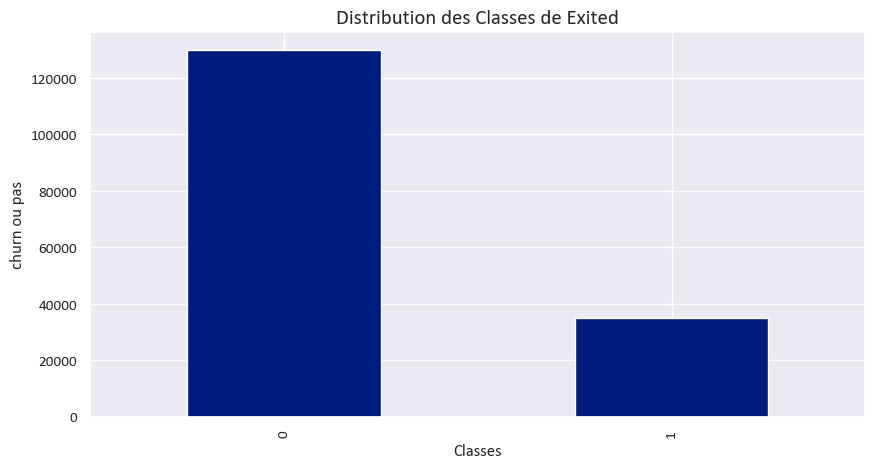

In [257]:
# Distribution des classes de la target
data['Exited'].value_counts().plot(kind='bar')
plt.title('Distribution des Classes de Exited')
plt.xlabel('Classes')
plt.ylabel('churn ou pas')
plt.show()

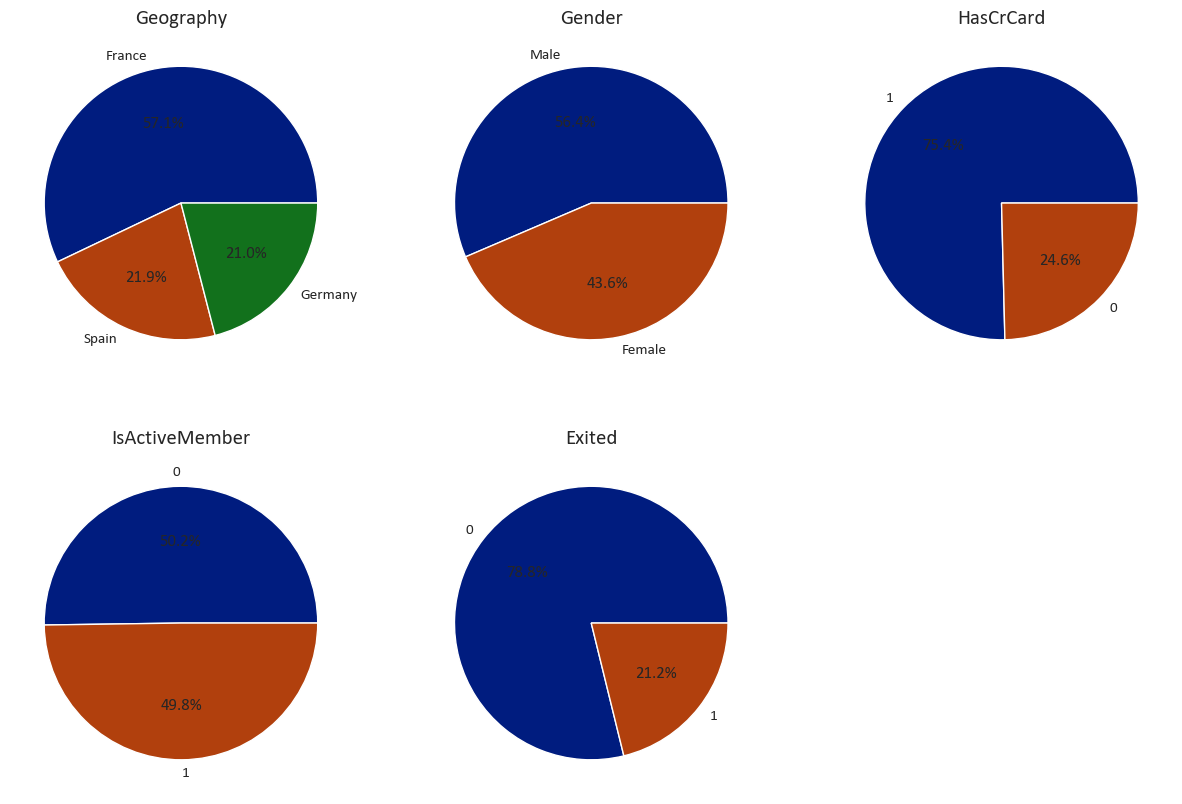

In [258]:
# représentation graphique des variables qualitatives
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(5):
    axes[i].set_title(categorical_features[i])
    data[categorical_features[i]].value_counts().plot(kind="pie", ax=axes[i], autopct='%1.1f%%', label="")
    axes[i].legend().remove()
fig.delaxes(axes[5])

plt.show()

### Variables quantitatives

#### HISTOGRAMMES

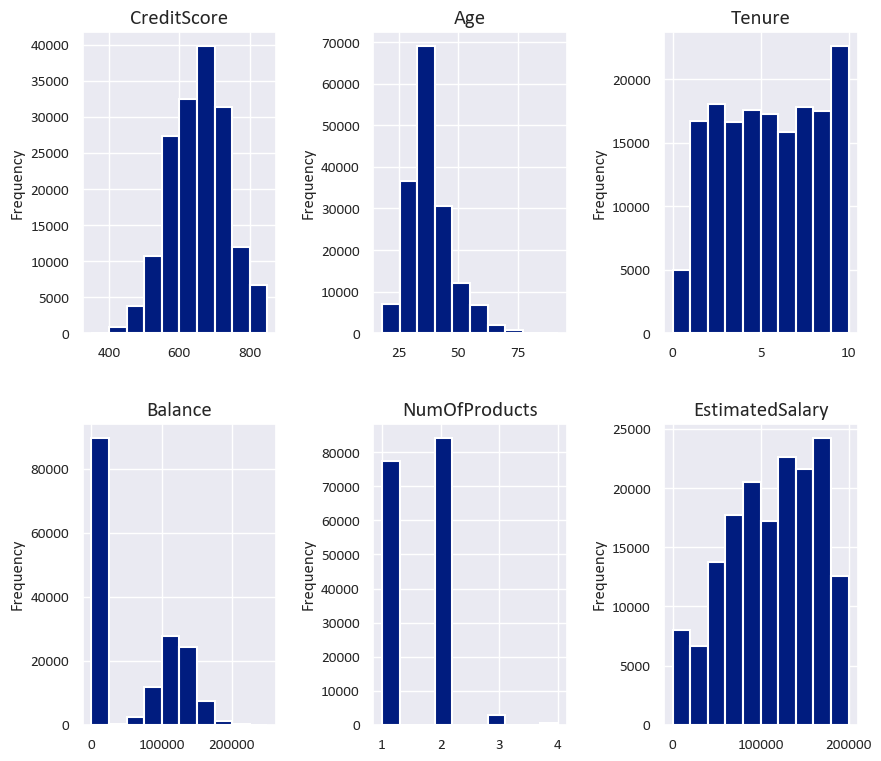

In [259]:
# représentation graphique des variables quantitatives
fig, axes = plt.subplots(num_rows, 3, figsize=(5, 10))
axes = axes.flatten()

for i in range(6):
    axes[i].set_title(numerical_features[i])
    data[numerical_features[i]].plot(kind="hist", ax=axes[i], figsize=(10, 9), edgecolor='white', linewidth=1.5)
    axes[i].legend().remove()

# Ajuster les marges entre les graphiques
plt.subplots_adjust(wspace=0.5, hspace=0.3)  

plt.show()

#### BOXPLOTS

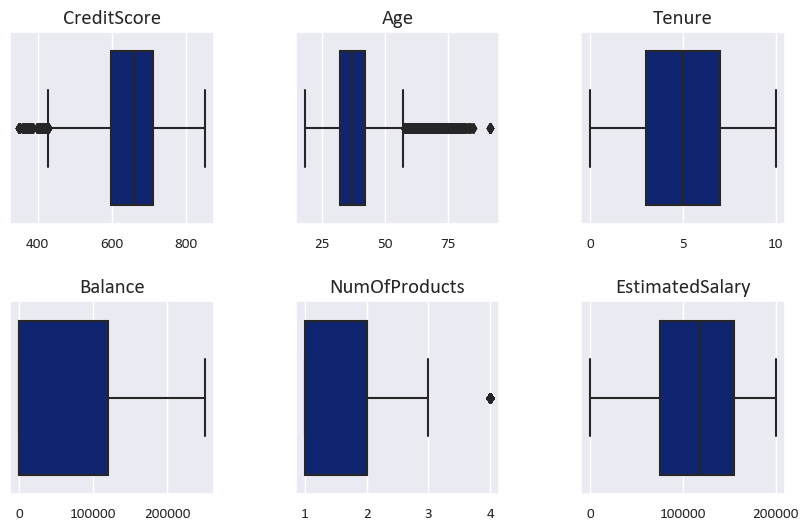

In [260]:
# BOXPLOTS
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i in range(6):
    sns.boxplot(x=numerical_features[i], data=data, ax=axes[i])
    axes[i].set_title(numerical_features[i])
    axes[i].set_xlabel('') 

plt.subplots_adjust(wspace=0.4, hspace=0.4)  
plt.show()

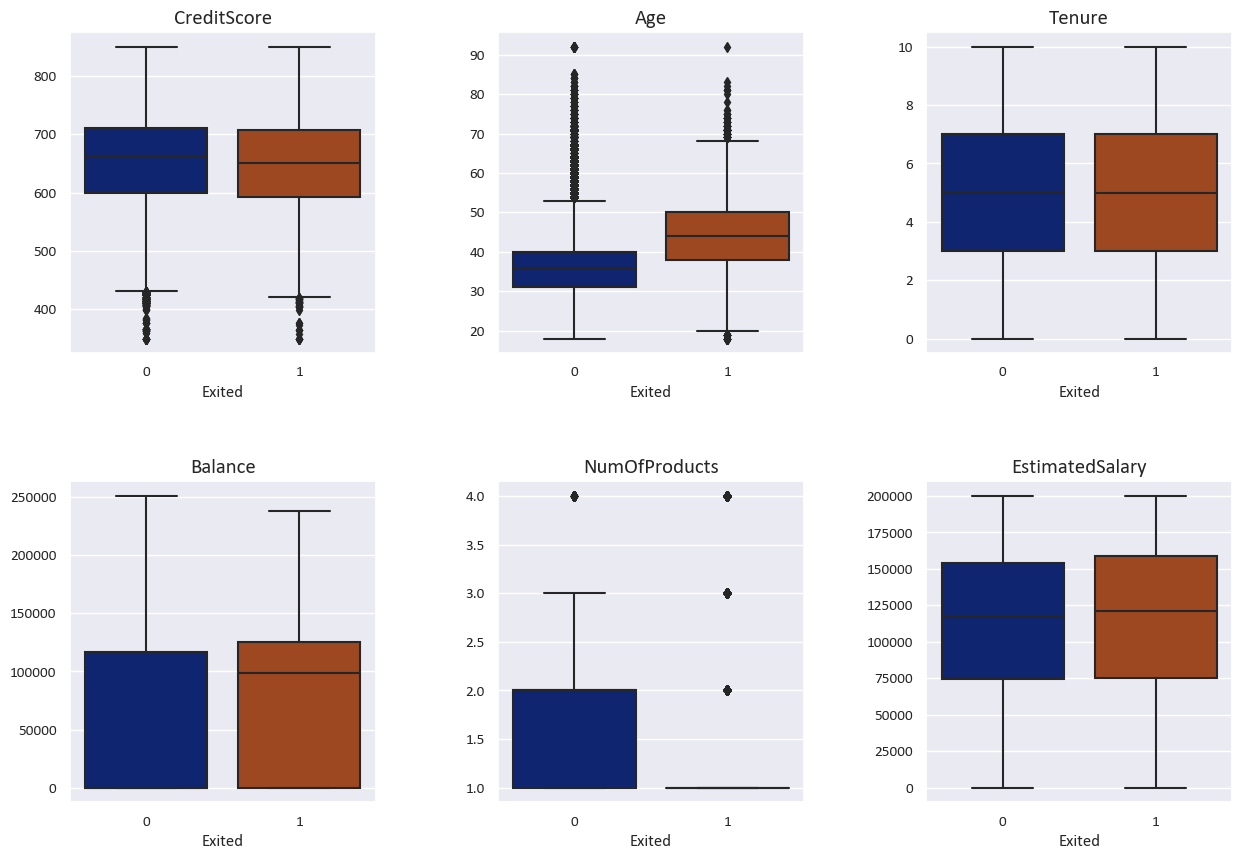

In [261]:
## en fonction de la variable cible Exited
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in range(6):
    sns.boxplot(x=data['Exited'], y=numerical_features[i], data=data, ax=axes[i])
    axes[i].set_title(numerical_features[i])
    axes[i].set_xlabel('Exited') 
    axes[i].set_ylabel('') 

plt.subplots_adjust(wspace=0.4, hspace=0.4)  
plt.show()

#### CORRELATIONS

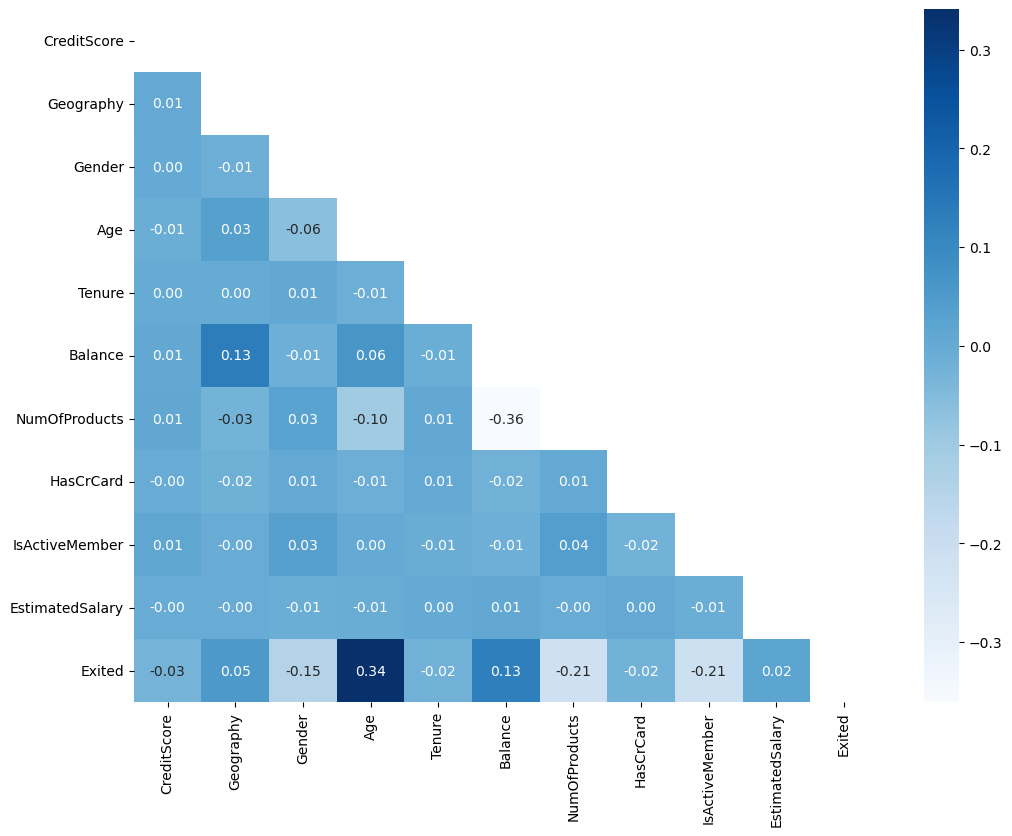

In [5]:
df_cor = df.copy()
df_cor = df_cor.drop(columns=['id', 'CustomerId','Surname'])
df_cor = df_cor.drop_duplicates()
for col in ['Geography', 'Gender']:
    df_cor[col] = LabelEncoder().fit_transform(df_cor[col])
df_cor = df_cor.corr()
plt.figure(figsize=(12, 9))
mask = np.triu(df_cor)
sns.heatmap(df_cor, annot=True, mask=mask, cmap='Blues', fmt=".2f", cbar=True, square=False)
plt.show()

## Traitement de données

- Nous n'avons pas de valeurs manquantes dans la base et les lignes dupliquées ont été supprimées
- Présence d'outliers

Au vue des boxplot ci_dessus, on voit que les variables susceptibles d'avoir des valeurs atypiques pouvant impacter dans la modèlisation sont `Age` et `CreditScore`. On va vérifier cela en regardant le nombre d'individu ayant une valeur de ces variables supérieur à un certain seuil (les quantiles).

In [263]:
data[data['Age']>data['Age'].quantile(0.999)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1329,743,France,Male,76.0,9,126076.24,1,1,1,34436.83,0
2792,711,France,Female,81.0,3,0.00,1,1,1,72276.24,1
6682,598,France,Male,76.0,7,0.00,2,0,1,124571.09,0
7120,678,France,Male,77.0,9,0.00,1,1,1,6795.61,0
8945,679,Germany,Female,77.0,8,77373.87,2,0,1,174873.09,0
...,...,...,...,...,...,...,...,...,...,...,...
162652,678,Spain,Female,84.0,8,87873.39,2,1,0,188227.80,0
162816,539,France,Male,79.0,2,0.00,2,0,1,170968.99,0
163066,641,France,Male,77.0,8,0.00,2,1,1,81514.06,0
163138,684,France,Female,92.0,3,95139.41,1,1,1,86575.46,0


153 individus ont un Age supérieur à la valeur en dessous de laquelle se trouvent 99.9% des données.

In [264]:
data[data['CreditScore']<data['CreditScore'].quantile(0.001)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
35,413,Germany,Male,28.0,3,130969.77,2,1,1,158891.79,0
169,359,France,Female,44.0,6,128747.69,1,0,1,146955.71,0
705,415,France,Male,32.0,5,145807.59,2,1,0,3064.65,0
2037,367,Spain,Female,35.0,6,93608.28,2,0,1,168816.73,0
2773,411,France,Male,38.0,7,0.00,2,1,1,75969.19,0
...,...,...,...,...,...,...,...,...,...,...,...
161323,411,France,Female,29.0,1,141325.56,1,1,1,93839.30,1
162508,350,France,Female,33.0,3,0.00,2,1,0,113796.15,0
162911,413,France,Female,39.0,5,130969.77,2,1,1,158891.79,0
163765,418,Spain,Female,28.0,7,71269.89,1,0,0,125912.77,0


163 individus ont un score de crédit inférieur à la valeur au dessus de laquelle se trouvent 99.9% des données.

Ces valeurs sont non négligeables et seront donc maintenues comme telle dans la suite. 

## Exportation de la base finale

In [268]:
# Exportation
data.to_csv("../data/churn-apure.csv", index=False)